# Chapter 10

### A classical inference

In [121]:
import numpy as np                # load numpy package
import matplotlib.pyplot as plt   # load pyplot package
from scipy.stats import norm     # load binomial distribution
from shapely.geometry import LineString

In [146]:
def normalvisual(mu, var, n):

    varavg = var / n  # variance of the average

    # standard deviation of the average

    sigma = np.sqrt(var)
    sigmaavg = np.sqrt(varavg)

    # Create a range
    x = np.linspace(0, 15, 10000)
    l = arr = np.full(len(x), .05)

    # Create the normal distribution for the range
    y = norm.pdf(x, mu, sigma)
    yavg = norm.pdf(x, mu, sigmaavg)
    tavg = 1-norm.cdf(mu+x, mu, sigmaavg)+norm.cdf(mu-x, mu, sigmaavg)

    # Create a figure with two subplots side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Plot the normal distribution on the left subplot
    axs[0].plot(x, yavg)
    axs[1].plot(x, tavg)
    axs[0].set_xlim(0, 15)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)    
    axs[1].plot(x, l, label='.05', color='r')


    # Plot the histogram on the right subplot
    # axs[1].hist(data, bins=30, density=True, alpha=0.6, color='g')

    # Set titles
    axs[0].set_title('pdf of X̅_{%i}~N(%1.1f, %1.3f)' % (n, mu, varavg))
    axs[1].set_title('probability of |X̅_{%i}-%1.1f|≥c, \n as function of c, \n (aka probability of Type I error \n as function of c)' % (n2, mu))
    axs[1].set_xlabel('c')  # Add x-axis label

    first_line = LineString(np.column_stack((x, tavg)))
    second_line = LineString(np.column_stack((x, l)))
    intersection = first_line.intersection(second_line)

    # ... existing code ...

    intersection = first_line.intersection(second_line)

    axs[1].axvline(x=intersection.x, color='g', label='%1.2f' % intersection.x)
    axs[1].legend()
    

    plt.show()

### Recalling a hypothesis test from the classical school

We are repeatedly and independently measure $X_1, \ldots, X_n$ which we assume to be normally distributed with common unknown mean and known variance. For the sake of concreteness, suppose that the variance is 1.

We want to know the value of $\mu$ such that $X_1, \ldots, X_n\sim N(\mu,1)$.

That is, we imagine we already know that the variance is 1, but we want to know where the center of the bell shape is.

We formulate the hypothesis that the center is at $\mu_0$:

- The null hypothesis $H_0$: $\hspace{5mm}$ $\mu=\mu_0$

- The alternative hypothesis $H_1$: $\hspace{5mm}$ $\mu \neq \mu_0$. 

We choose a comparatively large value $c>0$, and we adopt the following test:

- Test: reject $H_0$ if $T_n \geq c$.

where $T_n =\left|\overline{X}_n - \mu_0\right|$ and $\overline{X}_n = \frac{1}{n} \sum_{i=1}^n X_i$ is the average

If $c$ is large and the null hypothesis is true, then the event $T_n\geq c$ has small probability and thus the Type I error is low. 

In the special case of normals with fixed variance and fixed $n$, the probability of the Type I error is constant across all choices of the null hypothesis, as the following examples illustrate.

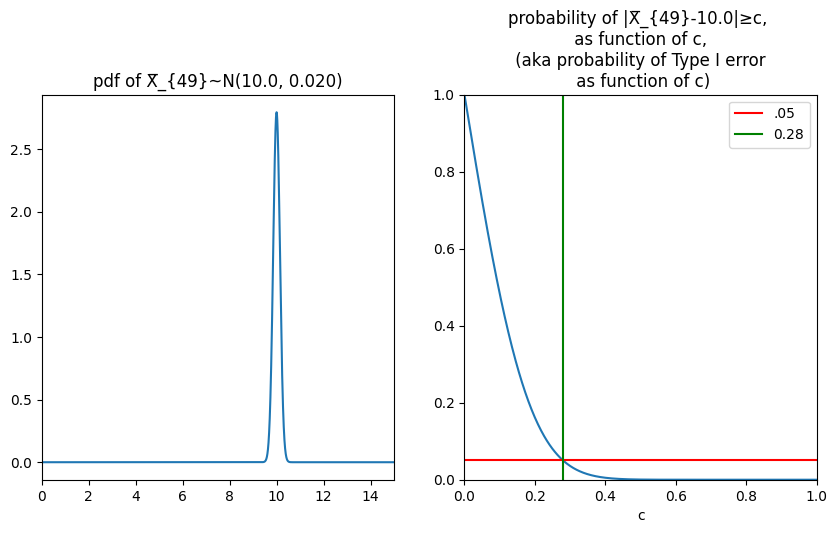

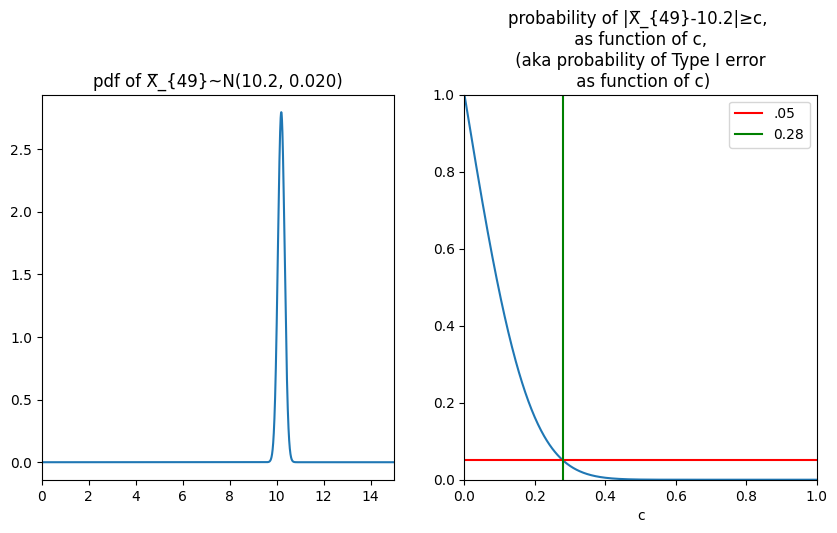

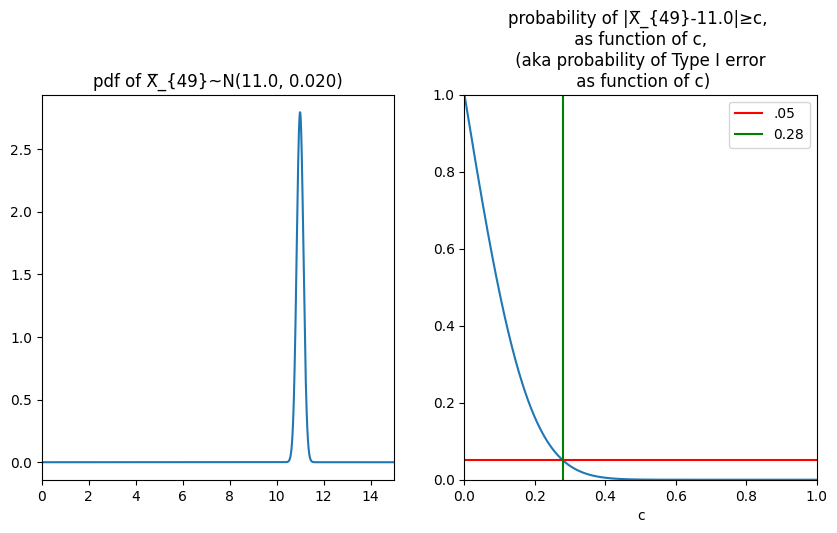

In [149]:
normalvisual(10, 1, 49)
normalvisual(10.2, 1, 49)
normalvisual(11, 1, 49)

### Rewriting this as an interval

Suppose that we choose $c$ optimally, right where the type I probability of the event $T_n\geq c$ falls below $.05$. In the above examples, it is $c=.28$.

Hence one has the probability of the event $T_n<c$ is above $.95$.

But $T_n<c$ 

iff $-c<\mu_0-\overline{X}_n<c$ 
     
iff $\overline{X}_n-c<\mu_0<\overline{X}_n+c$.

Hence the probability that "$\pm$ c of the average" contains the null hypothesis is above $.95$. And this holds regardless of what the null hypothesis is.
